Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to C:\Users\RAHUL/.cache\torch\hub\checkpoints\deeplabv3_resnet101_coco-586e9e4e.pth
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 233M/233M [00:17<00:00, 14.1MB/s]


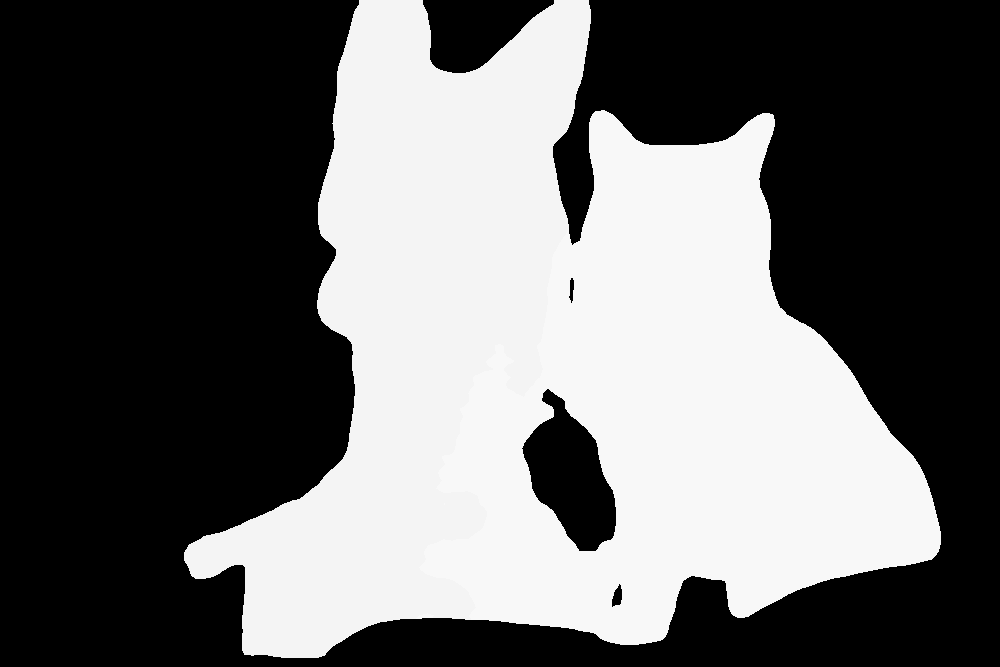

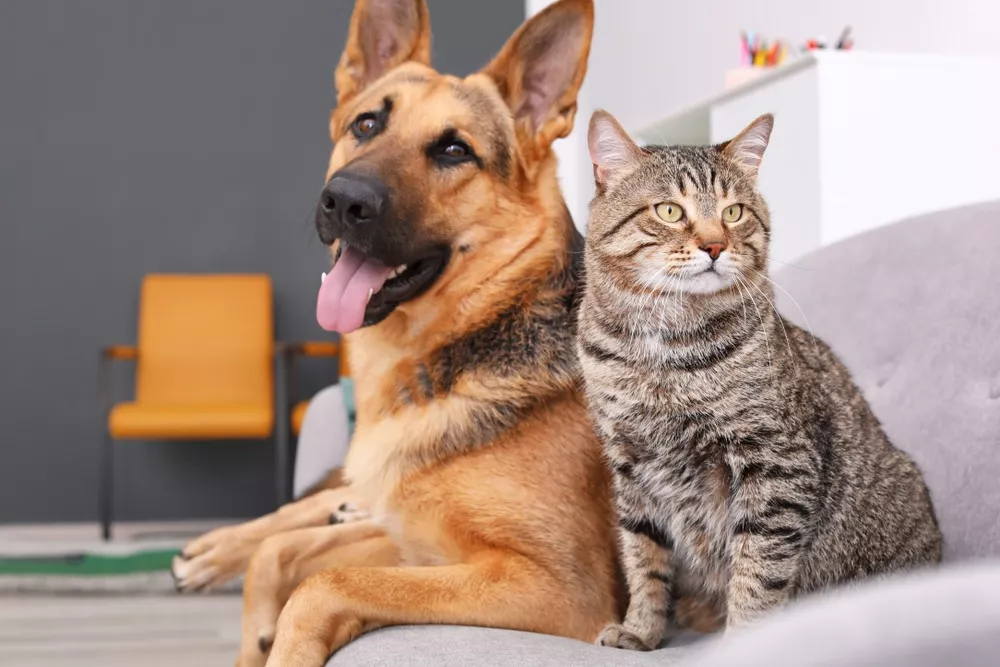

In [9]:
import torch
from torchvision import transforms
from PIL import Image
from torchvision.models.segmentation import deeplabv3_resnet101
from IPython.display import display

# Load the DeepLabV3 model
model = deeplabv3_resnet101(pretrained=True)
model.eval()
# Transform the input image
transform = transforms.Compose([
    transforms.ToTensor(),
])
# Load and transform the image
image_path = r"D:\shutterstock_1095001973.webp"
image = Image.open(image_path).convert('RGB')
input_tensor = transform(image).unsqueeze(0)
# Perform inference
with torch.no_grad():
    output = model(input_tensor)['out'][0]

# Convert the output to a binary mask
mask = output.argmax(0).cpu().numpy()

# Display the binary mask
binary_mask = (mask * 255).astype('uint8')
mask_image = Image.fromarray(binary_mask)
display(mask_image)

# Display the original image
display(image)
